# The greenest neighborhood in Pittsburgh

### By: The green machine
#### Group members: Sage Yanoff, Anshul Ramavath and Nick Girton 

![GIF](https://media.giphy.com/media/UBBJYj7kgrRpOOdwrv/giphy.gif)

What neighborhood is the best neighborhood in Pittsburgh? It depends what a person would consider the best? Our groups defenition of the  best neighborhood is the greenest neighborhood. In order to support our claim we will view what neighborhood in Pittsburgh has the most parks, trees and the lowest carbon foot print. We will also visualize are data to make it easier to read and understand. Then finally we will be able to determine the greenest neighborhood, which is ultimately the best neighborhood in Pittsburgh. What is the best neighborhood in Pittsburgh you will have to stay tuned to find out.

Before we get started we need to read in all of our data sets.

In [120]:
# importing pandas and geopandas
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas


Before we get started to find the best neighborhood in Pittsburgh we need to read in our data sets.

In [121]:
# reading all our data sets

# firstly the parks data set
parks = pd.read_csv("parks.csv")

# second the tree data set
stems = pd.read_csv("stems.csv",low_memory = False)


The last data set is more complex and we will read it in later on.

To find the greenest neighborhood in Pittsburgh we will start with finding the neighborhood with the msot parks in Pittsburgh.

## The neighborhood with the most parks in Pittsburgh
### By: Sage Yanoff

In order to support are claim of the greenest neighborhood, we will look at which neighborhood in Pittsburgh has the most parks.

![GIF](https://media.giphy.com/media/lFemKoVyp90I50wJFB/giphy.gif)


Firstly let us print out the first 10 rows of the parks data set to get a glimpse of what the data set contains.

In [122]:
# Printing out the first 10 rows of the parks dataset
parks.head(10)

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
5,223959093,Allegheny Riverfront Park,Park,Parks - Northern,NaN,Central Business District,6,2,42003020100,6,2,2,1-3,40.444591,-80.002416
6,1596467340,Alpine Gardens Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457673,-80.012852
7,1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855
8,2049886968,Amber Triangle,Traffic Island/Median,2nd Division,NaN,East Liberty,7,8,42003111500,2,8,5,3-23,40.459099,-79.931846
9,1047118140,Ammon Park,Park,Parks - Schenley,NaN,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449526,-79.978247


Shown above is all the columns of the dataset which contains other city buildings besides parks, so let us delete the uneccessary columns and buildings that are not parks.

so now I will create a revised dataset which deletes all the uneccesary columns and leaves two columns: the list of all the various neighborhoods in Pittsburgh and the various parks in the city of Pittsburgh.

In [123]:

# Dropping unneccessary columns and showing only parks
parks_revised = parks.drop(["id", "type", "maintenance_responsibility", "image", "council_district", "ward", "tract", "public_works_division", "pli_division", "police_zone", "fire_zone", "latitude", "longitude"], axis=1)
parks_revised = parks_revised.query('name.str.contains("Park")')

Now we have a neccesary dataset that I can work with, shown below are the first ten rows of the revised dataset.

In [124]:
# Printing the first 10 rows of the revised dataset
parks_revised.head(10)

,name,neighborhood
0,Able Long Park,Beechview
1,Albert Turk Graham Park,Crawford-Roberts
2,Alcoa Park,North Shore
4,Allegheny Landing Park,North Shore
5,Allegheny Riverfront Park,Central Business District
6,Alpine Gardens Park,Central Northside
7,Alton Park,Beechview
9,Ammon Park,Bedford Dwellings
10,Arlington Park,South Side Slopes
12,Armstrong Park,South Side Flats


Now we have the proper data I need, I will show the top 10 neighborhoods which contain the most parks in Pittsburgh, by sorting all the nieghborhoods and ordering them from least to greatest according to what park contains the most trees.

In [125]:
#Showing the top 10 neighborhoods in Pittsburgh that contain the most parks in order from most parks to least parks.
parks_revised['neighborhood'].value_counts().sort_values(ascending = False)[:10]


Beechview                    6
South Side Slopes            6
Troy Hill                    5
Hazelwood                    5
Mount Washington             5
Central Business District    5
South Side Flats             4
Marshall-Shadeland           4
Sheraden                     4
Elliott                      4
Name: neighborhood, dtype: int64

So clearly the neighborhood with the most parks in Pittsburgh is a tie between Beechview and South Side Slopes. now I will visualize the data.

Text(0, 0.5, 'parks')

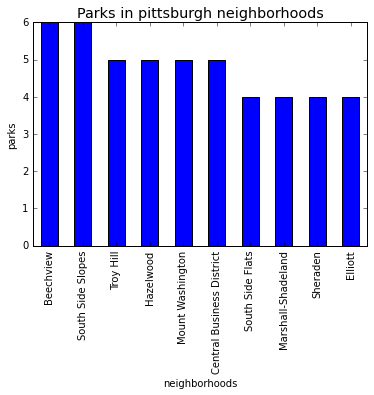

In [126]:
# Showing what neighborhood has the most amount of parks and plotting it in a bar graph
park_valueCount = parks_revised['neighborhood'].value_counts()
park_valueCount.sort_values(ascending = False)[:10].plot.bar()
# bar graph style
plt.style.use('classic')
# bar graph title
plt.title('Parks in pittsburgh neighborhoods')
# x axis label
plt.xlabel('neighborhoods')
# y axis label
plt.ylabel('parks')

So now we know the two neighborhoods with the most parks are South Side slopes and Beechview, I will visualize just those two neighborhoods.

Text(0, 0.5, 'parks')

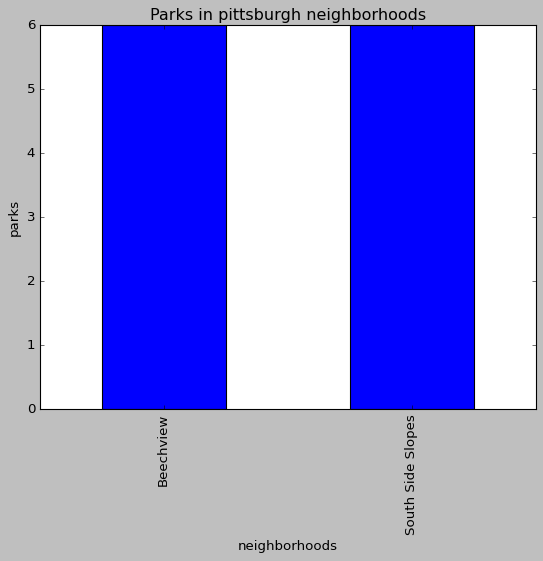

In [127]:
# visualizing the two neighborhoods that are tied with the most parks with a bar graph
parks_revised['neighborhood'].value_counts().sort_values(ascending = False)[:2].plot.bar()
# bar graph style
plt.style.use('classic')
# bar graph title
plt.title('Parks in pittsburgh neighborhoods')
# x axis label
plt.xlabel('neighborhoods')
# y axis label
plt.ylabel('parks')

In conclusion as shown in the first bar graph there is a tie between Beechview and South Side Slopes both containing six parks. The nieghborhoods with most parks is tied between Beechview and South Side Slopes. We will have to wait to see what neighborhood has the most trees and the lowest emissions to crown the greenest neighborhood in Pittsburgh.

Next we will explore the neighborhood with the most trees in Pittsburgh.

## The neighborhood with the most trees in Pittsburgh
### By: Anshul Ramavath

![GIF](https://media.tenor.com/azQNgH_ANzUAAAAC/flowers-tree.gif)

The data set has already been loaded in earlier so I will now sort the data and sum all the 'stems' which is basically all the number of trees.

In [128]:
# filter to important info
num_stems = stems.groupby("neighborhood").sum()['stems']
num_stems

neighborhood
Allegheny Center       928.0
Allegheny West         384.0
Allentown               82.0
Arlington              169.0
Arlington Heights        5.0
                       ...  
Upper Lawrenceville    348.0
West End               116.0
West Oakland           100.0
Westwood               304.0
Windgap                116.0
Name: stems, Length: 90, dtype: float64

We can now load the neighborhood in a variable and merge our previous data into it.

In [129]:
# do the merge
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
stems_map = neighborhoods.merge(num_stems, how='left', left_on='hood', right_on='neighborhood')

With the now merged data, we can visualize it to get a better idea of the data!

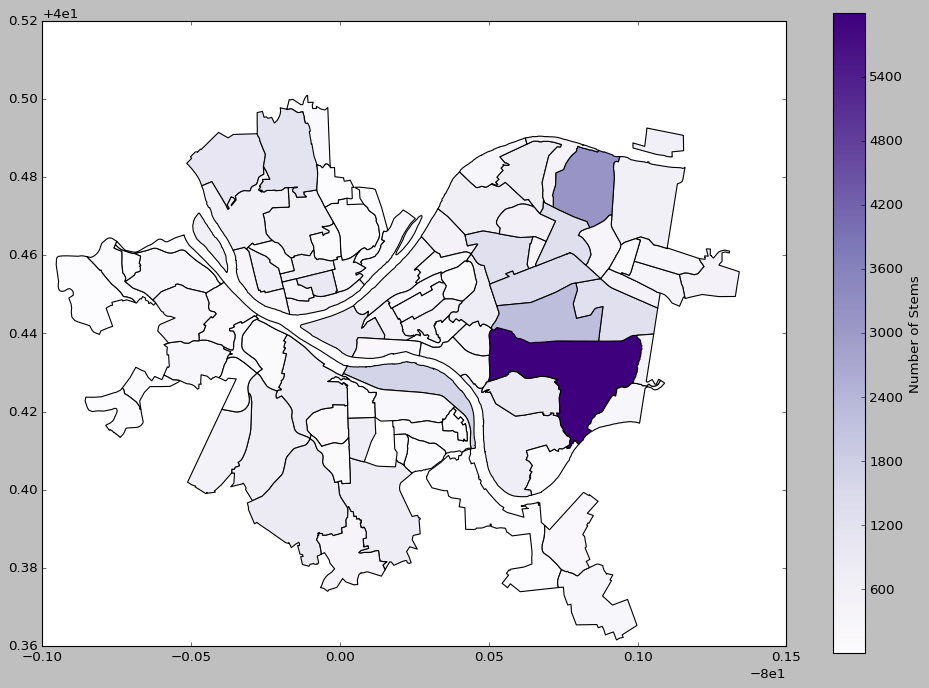

In [130]:
stems_map.plot(column='stems', # set the data to be used for coloring
                cmap = 'Purples', # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Stems"}, # label the legend
               figsize=(15, 10),# set the size
               )

We can also use our original data and show a bar graph with the corresponding neighborhood!

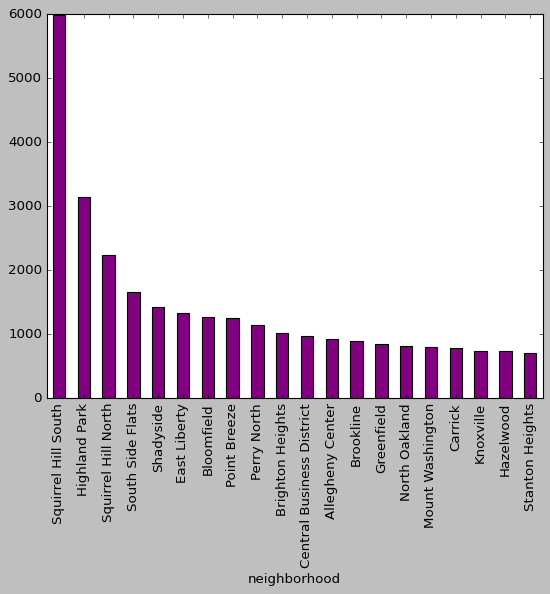

In [131]:
num_stems.sort_values(ascending=False)[:20].plot(kind='bar',color='purple')

Conclusion: After looking at the map, it is obvious that there is a winner that stands out compared to the rest of the neighborhood. The winner of the most "Green" neighborhood belongs to squirrel hill south! This also makes sense as Schelney Park is in that neighborhood!

Next we will show what neighborhood in Pittsburgh has the lowest emission

## Neighborhood with the lowest emissions Pittsburgh

### By: Nick Girton 

The last support to our group finding the greenest neighborhood with the lowest emissions, which helps save the enviroment an represents green by saving the enviroment which contains various pieces of greenery and parks.

![GIF](https://media.giphy.com/media/c00LLteGojGfDHZXur/giphy.gif)

I am Installing 'rtree' so that the geopandas.sjoin function can be used, and 'geopy' to use the geopandas geocoding

In [132]:
# need to install rtree in order for geopandas.sjoin to work
import sys
!{sys.executable} -m pip install rtree
!{sys.executable} -m pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


 Firstly I am reading the original emissions data set and then I am finding the longitude and latitude of each of the adresses in the data set.

In [133]:

# read the csv, only uses the needed columns, emissions and the address
emissions = pd.read_csv("PittsburghEnergy.csv", usecols=["Address 1","Total GHG Emissions (Metric Tons CO2e)"])
# Adds more detail to the addresses so the geocoder can discern the coordinates
emissions["Address 1"] = emissions["Address 1"].astype(str) + ", Pittsburgh, Pennsylvania, United States"
# the csv contains data from 6 different years, this makes sure we are only looking at the most current year
emissions = emissions[::6]

# uses geopandas geocoding to find the longitude and latitude of each address
the_locations = geopandas.tools.geocode(emissions["Address 1"], provider='nominatim', user_agent="Pittsburgh Emissions")
# Transfers the emissions column from the old data frame to the new dataframe
the_locations["Emissions"] = emissions["Total GHG Emissions (Metric Tons CO2e)"]

Firstly I am reading in the map files. Now I am going set the coordinates and match each address to a location on the map.

In [ ]:

# reads the shapefile
pittsburgh = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

# sets coordinate system
pittsburgh.to_crs("EPSG:4326")
#  combines the map with the coordinates by figuring out which coordinates are in which neighborhoods.
emissions_map = geopandas.sjoin(pittsburgh, the_locations, how ="inner")

# Used this to create the file that is used for the finalized plots:
# emissions_map.to_file("emissions.csv", driver="CSV")

Now I am going to vizualize my data and show what neighborhood in Pittsburgh has the lowest emissions.

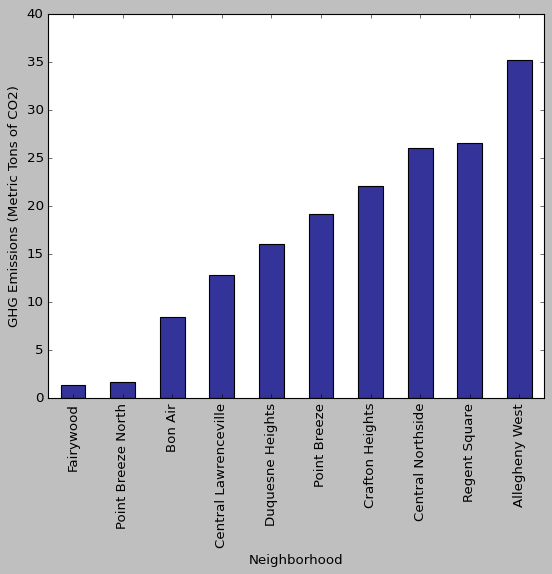

In [134]:
# reads the new csv, looks at only the neighborhoods and emissions
emissions_thing = pd.read_csv("emissions.csv", usecols=["hood","Emissions"])
# Makes sure all the emission values are summed for the neighborhoods
emissions_vals = emissions_thing.groupby("hood").sum()["Emissions"]

# sorts the values in ascending order
emissions_vals = emissions_vals.sort_values(ascending=True)
# plots on bar graph of the 10 smallest Emissions values
emissions_vals.head(10).plot(kind = "bar", x="hood", y="emissions", xlabel="Neighborhood", ylabel="GHG Emissions (Metric Tons of CO2)",
                            colormap = "terrain")

The nieghborhood with the least emisions is Fairywood.

No I will show it in the form of a map.

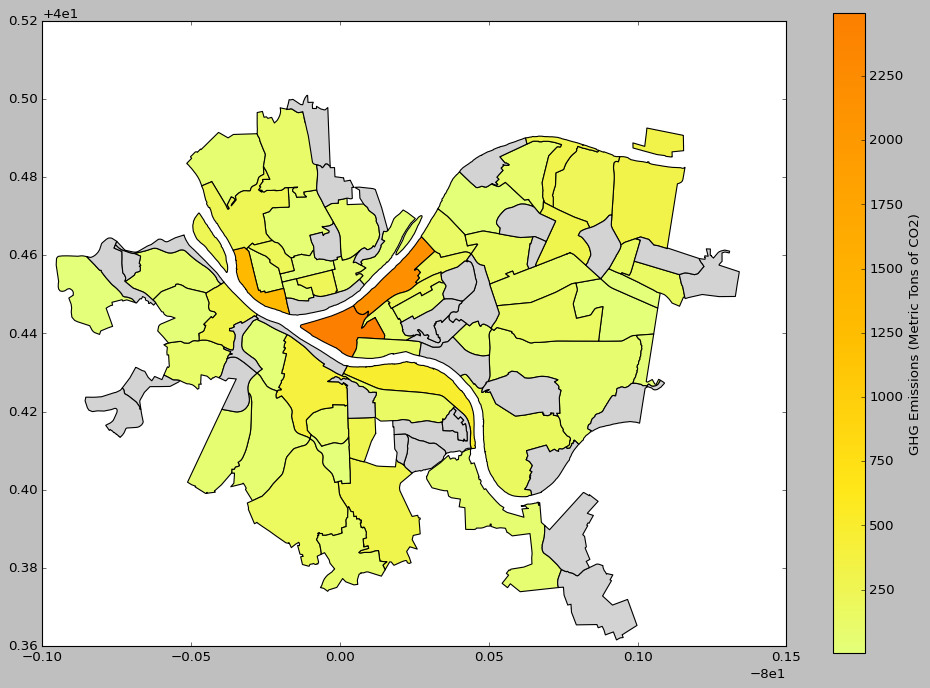

In [135]:
# plots the map. More orange = more GHG emissions, more green = less. Grey = No data
emissions_map = pittsburgh.merge(emissions_vals, how='left', left_on='hood', right_on='hood')
emissions_map.plot(column='Emissions', cmap="Wistia", edgecolor="black", figsize=(15,10), legend= True, 
                   legend_kwds={'label': "GHG Emissions (Metric Tons of CO2)"}, missing_kwds={"color": "lightgrey"})

CONCLUSION:
As can be seen in the bar graph, both Fairywood and Point Breeze North have the lowest emissions out of all the neighborhoods in Pittsburgh, with Fairywood having slightly less. The map also illutrates this, with Fairywood being the light green neighborhood on the far left edge. 

Now we will combine all our data sets to determine the greenest neighborhood in Pittsburgh.

## Combining all our data sets together

Weighting all data sets so they all match with the scale of the emissions data set.

In [136]:
# weighting the parks data set
newparkData = park_valueCount.multiply(417)


In [137]:
# weighting the trees data set
newdataTrees = num_stems.multiply(1/2.3).sort_values(ascending=False)

No we are going to combine and visualize all our data sets together to find the greenest neighborhood in Pittsburgh

In [144]:
# Creating a dictionary
finalDic = dict()
# adding trees to the dictionary
for i in newdataTrees.index:
    finalDic[i] = newdataTrees[i]

 # itterating through parks data
for i in newparkData.index:
    if i in finalDic:
        # adding parks to the dictionary
         finalDic[i] += newparkData[i]
    else:
        # the dictionary stays the same
         finalDic[i] = newparkData[i]
            
            
# sets a max value to the emissions
emmyMax = emissions_vals.max()
# iterates through the emissions data
for i in emissions_vals.index:
    if i in finalDic:
        # subtracts value from max so that lower values = better ranking
        # adds subtracted value to dictionary
        finalDic[i] += emmyMax - emissions_vals[i]
    else:
        # also subtracts value
        finalDic[i] = emmyMax - emissions_vals[i] 
            

finalDic

{'Squirrel Hill South': 6281.256521739131,
 'Highland Park': 4466.291304347826,
 'Squirrel Hill North': 3720.521739130435,
 'South Side Flats': 4385.973913043479,
 'Shadyside': 2995.7000000000003,
 'East Liberty': 4456.865217391305,
 'Bloomfield': 4143.117391304348,
 'Point Breeze': 3851.5782608695654,
 'Perry North': 3701.3565217391306,
 'Brighton Heights': 4120.869565217392,
 'Central Business District': 2510.6521739130435,
 'Allegheny Center': 3087.8782608695656,
 'Brookline': 3528.386956521739,
 'Greenfield': 1204.0,
 'North Oakland': 352.1739130434783,
 'Mount Washington': 4529.269565217392,
 'Carrick': 3802.213043478261,
 'Knoxville': 2541.7000000000003,
 'Hazelwood': 4724.726086956522,
 'Stanton Heights': 3127.891304347826,
 'Manchester': 3973.252173913044,
 'Central Northside': 4012.6478260869567,
 'Beechview': 5235.473913043479,
 'Central Lawrenceville': 3177.934782608696,
 'Marshall-Shadeland': 4192.834782608696,
 'Perry South': 3546.7260869565216,
 'Lincoln-Lemington-Belmar'

Visualizing the combined data as a bar graph.

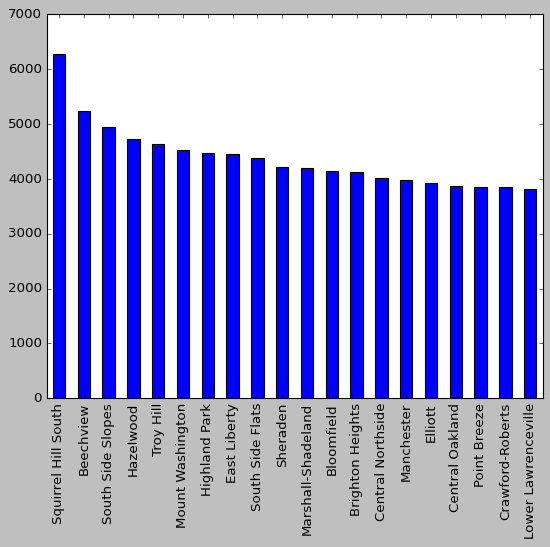

In [146]:
# visualizes combined data as bar graph
finalSer = pd.Series(finalDic, name = "Most Green")
finalSer.sort_values(ascending=False)[:20].plot.bar()


So clearly the best neighborhood in Pittsburgh is? Squirrel Hill South. This is shown by the bar graph, this shows that this neighborhood had th most parks, trees and lowest emissions, with are value scale. So there we have it Squirrel Hill South reigns supreme.